In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
df = pd.read_csv('C:/Users/Tusha/OneDrive/Desktop/GL - DSE/capstone/Vehicle/train.csv')
df.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [107]:
x = df.drop('loan_default',axis = 1)
y = df['loan_default']

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
trainx,testx, trainy, testy = train_test_split(x,y, test_size = 0.30, random_state = 10)

In [110]:
print(trainx.shape)
print(testx.shape)

(163207, 40)
(69947, 40)


In [111]:
df.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default'],
      dtype='object')

In [112]:
df['PRI.NO.OF.ACCTS'].sum()

569044

In [113]:
df['PRI.ACTIVE.ACCTS'].sum()

242456

In [114]:
df['PRI.OVERDUE.ACCTS'].sum()

36500

In [115]:
df.shape

(233154, 41)

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UniqueID                             233154 non-null  int64  
 1   disbursed_amount                     233154 non-null  int64  
 2   asset_cost                           233154 non-null  int64  
 3   ltv                                  233154 non-null  float64
 4   branch_id                            233154 non-null  int64  
 5   supplier_id                          233154 non-null  int64  
 6   manufacturer_id                      233154 non-null  int64  
 7   Current_pincode_ID                   233154 non-null  int64  
 8   Date.of.Birth                        233154 non-null  object 
 9   Employment.Type                      225493 non-null  object 
 10  DisbursalDate                        233154 non-null  object 
 11  State_ID     

In [117]:
len(df.select_dtypes(include = 'number').columns)

35

In [118]:
df.select_dtypes(include = 'number').columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'State_ID',
       'Employee_code_ID', 'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag',
       'VoterID_flag', 'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS',
       'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT',
       'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS',
       'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT',
       'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT', 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
       'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'NO.OF_INQUIRIES',
       'loan_default'],
      dtype='object')

In [119]:
len(df.select_dtypes(exclude = 'number').columns)

6

In [120]:
df.select_dtypes(exclude = 'number').columns

Index(['Date.of.Birth', 'Employment.Type', 'DisbursalDate',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'AVERAGE.ACCT.AGE',
       'CREDIT.HISTORY.LENGTH'],
      dtype='object')

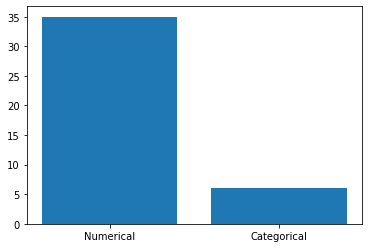

In [121]:
plt.bar(x = ['Numerical', 'Categorical'], height = [len(df.select_dtypes(include = 'number').columns), len(df.select_dtypes(exclude = 'number').columns)])
plt.show()

## Exploratory Data Analysis and Visualization

### Boxplot bw loan default and (PRIMARY.INSTAL.AMT, asset_cost)

<AxesSubplot:xlabel='loan_default', ylabel='asset_cost'>

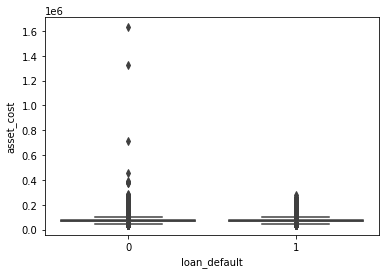

In [31]:
sns.boxplot(x = 'loan_default', y = 'asset_cost', data = df)

<AxesSubplot:xlabel='loan_default', ylabel='PRIMARY.INSTAL.AMT'>

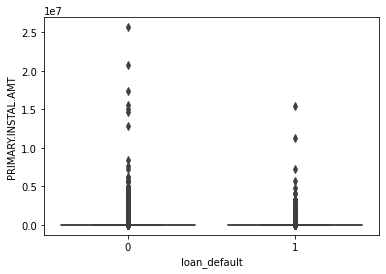

In [32]:
sns.boxplot(x = 'loan_default', y = 'PRIMARY.INSTAL.AMT', data = df)

### Features belongs to customer primary account

In [33]:
cols = df[['PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT','PRIMARY.INSTAL.AMT']].columns

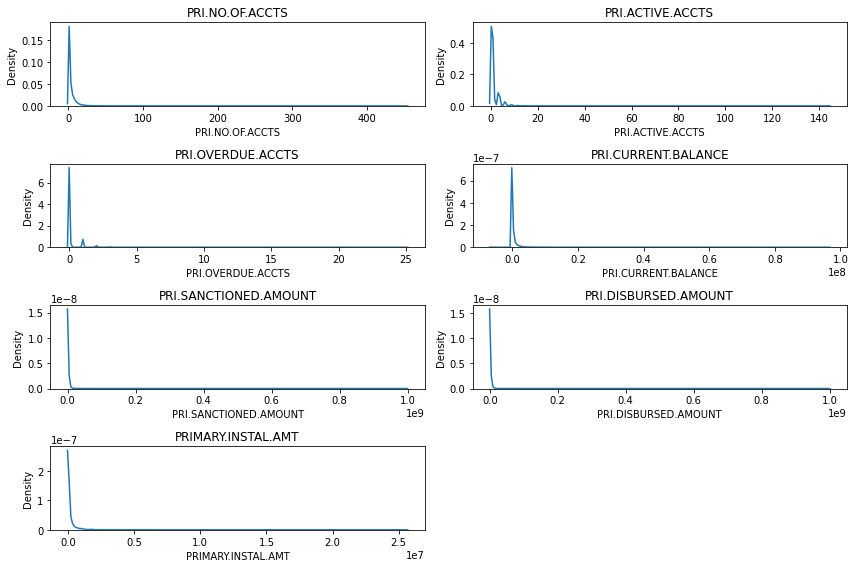

In [34]:
a = 4 
b = 2 
counter = 1 

plt.figure(figsize = [12, 8])

for i in cols:
    plt.subplot(a,b,counter)
    plt.title(i)
    sns.kdeplot(df.loc[:, i])
    counter = counter+1 

plt.tight_layout()
plt.show()

In [35]:
df['Total_loan_taken_']=pd.cut(df['PRI.NO.OF.ACCTS'],bins=[-1,0,1,800],
                                labels=['0_loan_taken','Only_1_loan_taken','More_than_1_loan'])

In [36]:
pd.crosstab(df['Total_loan_taken_'],df['loan_default'],normalize='columns')*100

loan_default,0,1
Total_loan_taken_,,
0_loan_taken,49.247575,53.450831
Only_1_loan_taken,14.923059,15.287191
More_than_1_loan,35.829366,31.261979


<AxesSubplot:xlabel='Total_loan_taken_'>

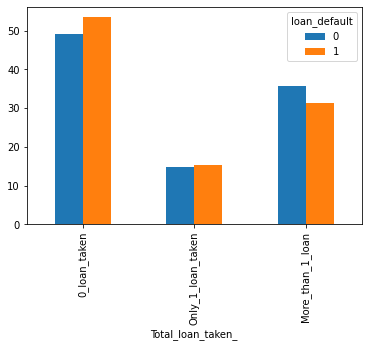

In [37]:
(pd.crosstab(df['Total_loan_taken_'],df['loan_default'],normalize='columns')*100).plot(kind='bar')

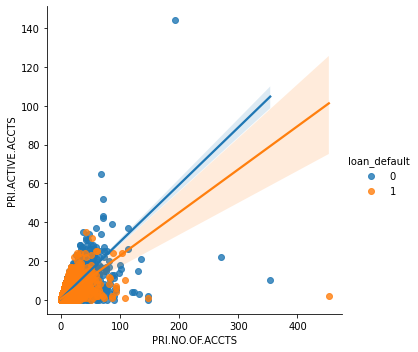

In [38]:
sns.lmplot(data=df,x='PRI.NO.OF.ACCTS', y='PRI.ACTIVE.ACCTS',hue='loan_default')

<AxesSubplot:xlabel='PRI.NO.OF.ACCTS', ylabel='PRI.ACTIVE.ACCTS'>

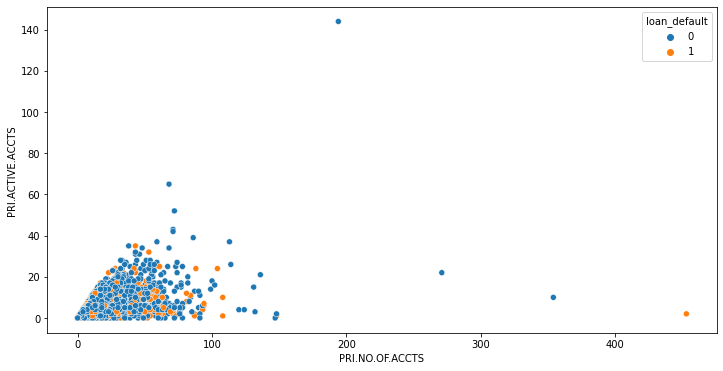

In [39]:
plt.figure(figsize=[12,6])
sns.scatterplot(data=df,x='PRI.NO.OF.ACCTS', y='PRI.ACTIVE.ACCTS',hue='loan_default')

In [3]:
df[['PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS']].corr()

,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS
PRI.NO.OF.ACCTS,1.000000,0.753565
PRI.ACTIVE.ACCTS,0.753565,1.000000


In [4]:
df.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default'],
      dtype='object')

In [5]:
df[['SEC.DISBURSED.AMOUNT','SEC.CURRENT.BALANCE']].corr()

,SEC.DISBURSED.AMOUNT,SEC.CURRENT.BALANCE
SEC.DISBURSED.AMOUNT,1.000000,0.929995
SEC.CURRENT.BALANCE,0.929995,1.000000


In [11]:
df[['AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH']].corr()

,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH
AVERAGE.ACCT.AGE,1.000000,0.831952
CREDIT.HISTORY.LENGTH,0.831952,1.000000


<AxesSubplot:>

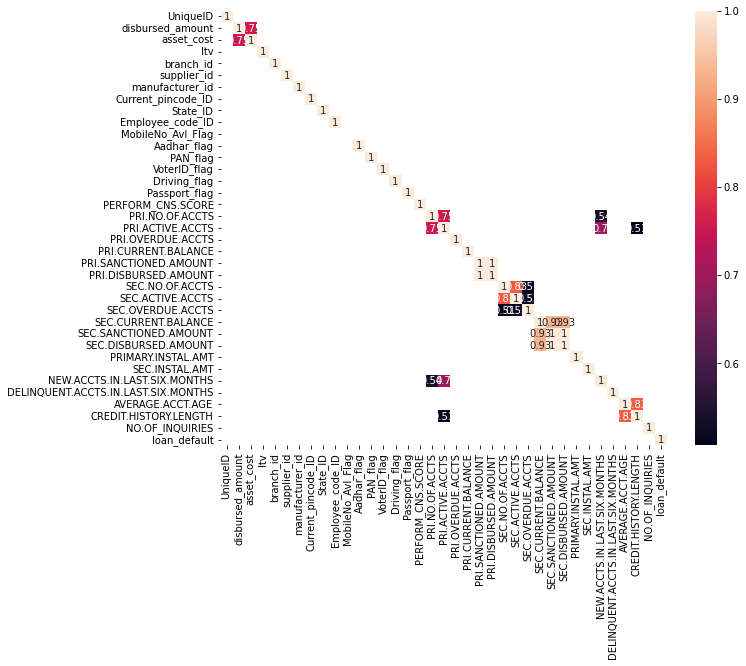

In [14]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr()[df.corr() > 0.5], annot = True)

In [40]:
df['Number_of_Active_Loan']=pd.cut(df['PRI.ACTIVE.ACCTS'],bins=[-1,0,1,66],labels=['0_Active_Loan','Only_1_Active_loan','More_than_1_active_loan'])

In [41]:
pd.crosstab(df['Number_of_Active_Loan'],df['loan_default'],normalize='columns')*100

loan_default,0,1
Number_of_Active_Loan,,
0_Active_Loan,58.049654,61.352275
Only_1_Active_loan,18.008458,18.142301
More_than_1_active_loan,23.941887,20.505424


<AxesSubplot:xlabel='Number_of_Active_Loan'>

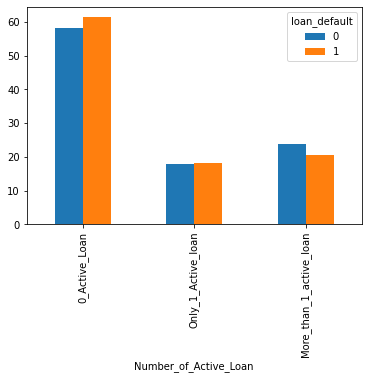

In [42]:
(pd.crosstab(df['Number_of_Active_Loan'],df['loan_default'],normalize='columns')*100).plot(kind='bar')

In [43]:
df['Number_of_Overdue_Account']=pd.cut(df['PRI.OVERDUE.ACCTS'],bins=[-1,0,1,40],
                                        labels=['0_overdue','Only_1_overdue','More_than_1_overdue'])

In [44]:
pd.crosstab(df['Number_of_Overdue_Account'],df['loan_default'],normalize='columns')*100

loan_default,0,1
Number_of_Overdue_Account,,
0_overdue,89.552051,85.767916
Only_1_overdue,7.991542,10.634052
More_than_1_overdue,2.456408,3.598032


<AxesSubplot:xlabel='Number_of_Overdue_Account'>

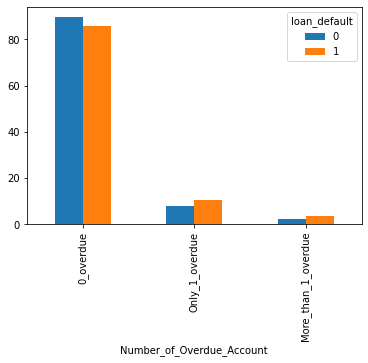

In [45]:
(pd.crosstab(df['Number_of_Overdue_Account'],df['loan_default'],normalize='columns')*100).plot(kind='bar')

In [46]:
df['Total_Primary_Principal_Outst_Amount']=pd.cut(df['PRI.CURRENT.BALANCE'],bins=[-6700000,-1,0,97000000],
                                labels=['fails_to_make_payments','No_Outstanding','money_left_to_spend'])

In [47]:
pd.crosstab(df['Total_Primary_Principal_Outst_Amount'],df['loan_default'],normalize=True)*100

loan_default,0,1
Total_Primary_Principal_Outst_Amount,,
fails_to_make_payments,0.164269,0.027879
No_Outstanding,47.057310,13.716256
money_left_to_spend,31.071309,7.962977


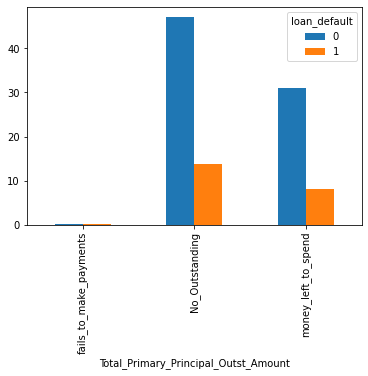

In [48]:
(pd.crosstab(df['Total_Primary_Principal_Outst_Amount'],df['loan_default'],normalize=True)*100).plot(kind="bar")
plt.show()

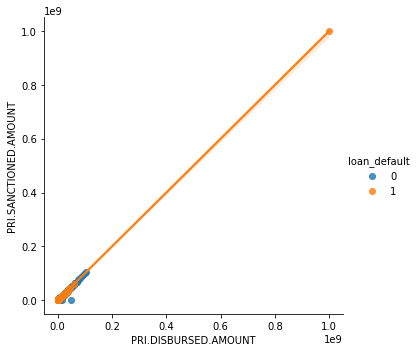

In [49]:
sns.lmplot(data=df,x='PRI.DISBURSED.AMOUNT', y='PRI.SANCTIONED.AMOUNT',hue='loan_default')

<AxesSubplot:xlabel='PRI.SANCTIONED.AMOUNT', ylabel='PRI.DISBURSED.AMOUNT'>

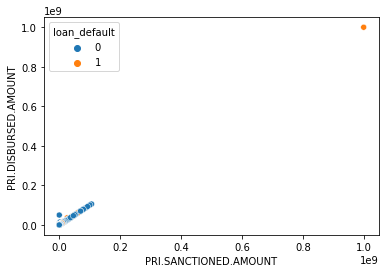

In [50]:
sns.scatterplot(x=df['PRI.SANCTIONED.AMOUNT'], y=df['PRI.DISBURSED.AMOUNT'],hue=df['loan_default'])


In [51]:
df_pri=df[['PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT','PRIMARY.INSTAL.AMT','loan_default']]

<AxesSubplot:>

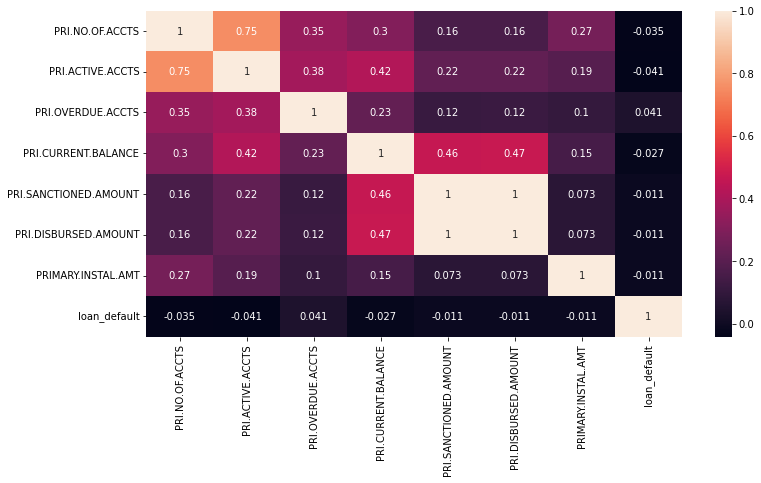

In [52]:
plt.figure(figsize=[12,6])
sns.heatmap(df_pri.corr(),annot=True)

### Features Belongs to the secondary account of the customer

In [53]:
sec_cols = df[['SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT','SEC.INSTAL.AMT']].columns

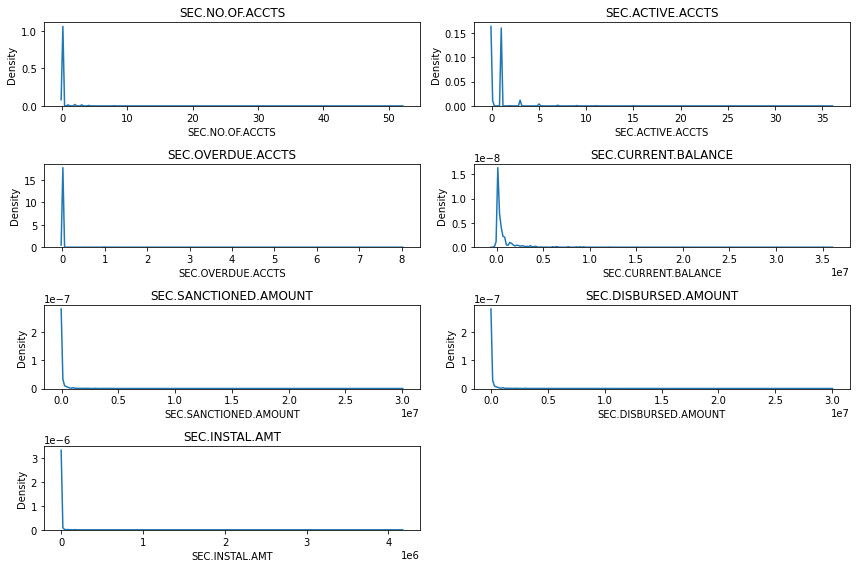

In [54]:
a = 4 
b = 2 
counter = 1 

plt.figure(figsize = [12, 8])

for i in sec_cols:
    plt.subplot(a,b,counter)
    plt.title(i)
    sns.kdeplot(df.loc[:, i])
    counter = counter+1 

plt.tight_layout()
plt.show()

In [55]:
df['Total_Principal_Outstanding_Amount']=pd.cut(df['SEC.CURRENT.BALANCE'],bins=[-800000,-1,0,8000000],
                                labels=['fails_to_make_payments','No_Outstanding','money_left_to_spend'])

In [56]:
pd.crosstab(df['Total_Principal_Outstanding_Amount'],df['loan_default'],normalize=True)*100

loan_default,0,1
Total_Principal_Outstanding_Amount,,
fails_to_make_payments,0.023162,0.003002
No_Outstanding,77.125761,21.437334
money_left_to_spend,1.143948,0.266792


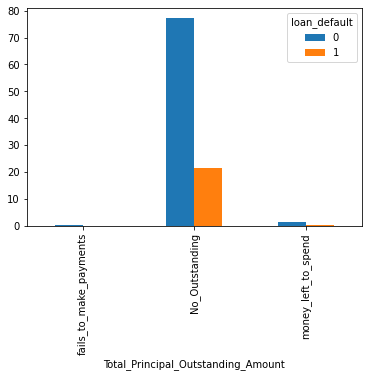

In [57]:
(pd.crosstab(df['Total_Principal_Outstanding_Amount'],df['loan_default'],normalize=True)*100).plot(kind="bar")
plt.show()

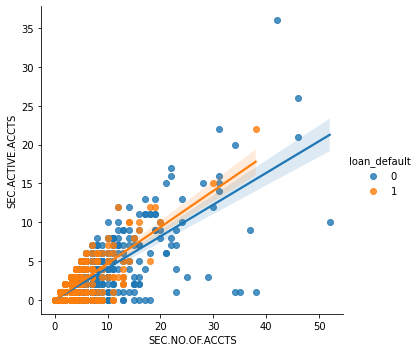

In [58]:
sns.lmplot(data=df,x='SEC.NO.OF.ACCTS', y='SEC.ACTIVE.ACCTS',hue='loan_default');

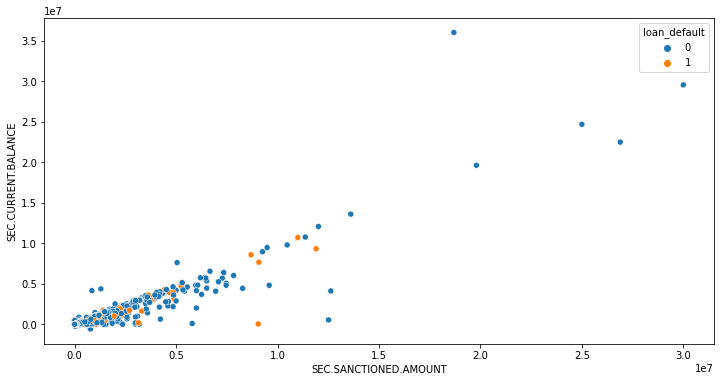

In [59]:
plt.figure(figsize=[12,6])
sns.scatterplot(y=df['SEC.CURRENT.BALANCE'], x=df['SEC.SANCTIONED.AMOUNT'],hue=df['loan_default']);

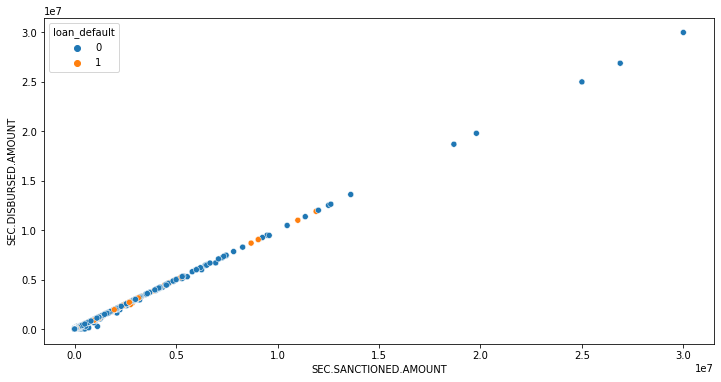

In [60]:
plt.figure(figsize=[12,6])
sns.scatterplot(y=df['SEC.DISBURSED.AMOUNT'], x=df['SEC.SANCTIONED.AMOUNT'],hue=df['loan_default']);

<Figure size 864x432 with 0 Axes>

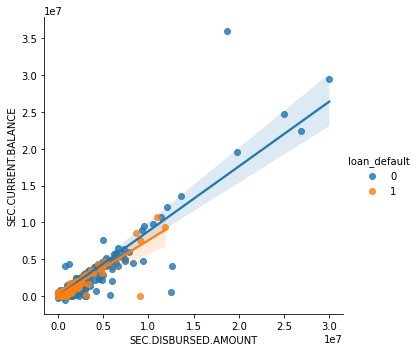

In [61]:
plt.figure(figsize=[12,6])
sns.lmplot(data=df,y='SEC.CURRENT.BALANCE',x= 'SEC.DISBURSED.AMOUNT',hue='loan_default');

### Features belongs to customer bureau score and credit details

In [62]:
df['Bureau score category'] = pd.cut(df['PERFORM_CNS.SCORE'], bins = [-1,300,600,700,760,800,900], labels = ['Risky','low','fair','good','better', 'extremely good'])

In [63]:
bc = df['Bureau score category'].value_counts(normalize = True)*100
bc

Risky             59.428961
good              12.117313
fair              10.422296
low                8.027312
extremely good     6.164595
better             3.839522
Name: Bureau score category, dtype: float64

<AxesSubplot:>

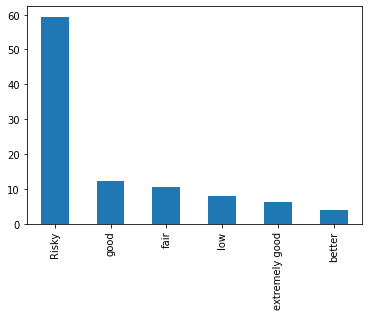

In [64]:
bc.plot.bar()

In [65]:
df_new_4 = pd.get_dummies(df['loan_default'])

In [66]:
df['non default'] = df_new_4[0]
df['default'] = df_new_4[1]

In [67]:
g = df.groupby('PERFORM_CNS.SCORE.DESCRIPTION')['non default', 'default'].sum()/len(df)*100
g

C:\Users\Tusha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,non default,default
PERFORM_CNS.SCORE.DESCRIPTION,,
A-Very Low Risk,5.053741,1.004057
B-Very Low Risk,3.428206,0.518112
C-Very Low Risk,5.693662,1.188056
D-Very Low Risk,4.142755,0.728703
E-Low Risk,2.067732,0.428901
F-Low Risk,2.961562,0.677664
G-Low Risk,1.373341,0.337116
H-Medium Risk,2.228999,0.711118
I-Medium Risk,1.733618,0.649785


<AxesSubplot:xlabel='PERFORM_CNS.SCORE.DESCRIPTION'>

<Figure size 1500x1000 with 0 Axes>

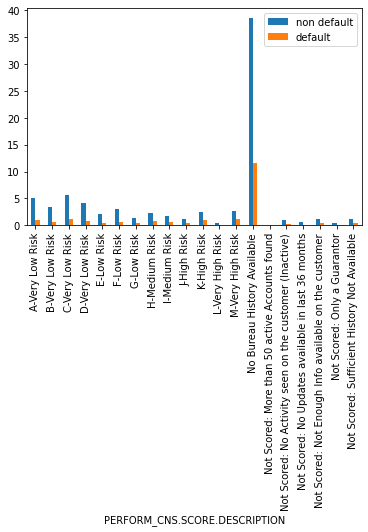

In [68]:
plt.figure(figsize = (15,10), dpi = 100)
g.plot.bar()

In [69]:
bs = df[df['default'] == 1]['Bureau score category'].value_counts(normalize = True)*100
status = df['loan_default'].value_counts(normalize = True)*100
bs

Risky             64.191579
low               10.039320
fair               9.650076
good               9.106716
extremely good     4.657090
better             2.355219
Name: Bureau score category, dtype: float64

C:\Users\Tusha\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  after removing the cwd from sys.path.


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

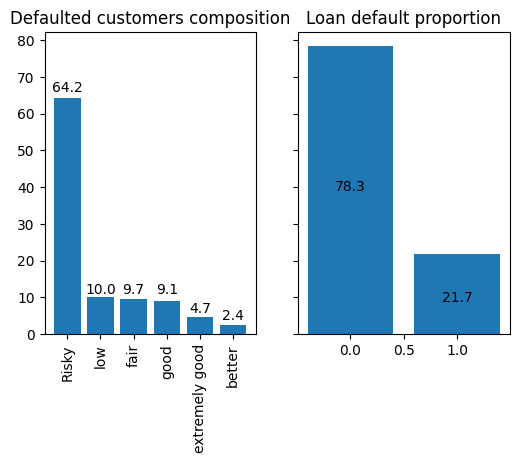

In [70]:
fig,ax = plt.subplots(1,2, sharey = True, figsize = (6,4), dpi = 100)
ax[0].bar(bs.index, bs.values)
ax[1].bar(status.index, status.values)
ax[0].set_xticklabels(labels = bs.index, rotation = 90)
ax[0].set_title('Defaulted customers composition')
ax[1].set_title('Loan default proportion')
ax[0].text('Risky',67,np.round(bs[0],1),horizontalalignment='center',verticalalignment='center')
ax[0].text('low',12,np.round(bs[1],1),horizontalalignment='center',verticalalignment='center')
ax[0].text('fair',12,np.round(bs[2],1),horizontalalignment='center',verticalalignment='center')
ax[0].text('good',12,np.round(bs[3],1),horizontalalignment='center',verticalalignment='center')
ax[0].text('extremely good',7,np.round(bs[4],1),horizontalalignment='center',verticalalignment='center')
ax[0].text('better',5,np.round(bs[5],1),horizontalalignment='center',verticalalignment='center')
ax[1].text(0,40,np.round(status[0],1),horizontalalignment='center',verticalalignment='center')
ax[1].text(1,10,np.round(status[1],1),horizontalalignment='center',verticalalignment='center')
plt.tight_layout

In [72]:
bs1 = df[df['default'] == 0]['Bureau score category'].value_counts(normalize = True)*100
bs1

Risky             58.108500
good              12.952017
fair              10.636398
low                7.469473
extremely good     6.582559
better             4.251053
Name: Bureau score category, dtype: float64

In [ ]:
ct = (pd.crosstab(df['Passport_flag'], df['loan_default'], normalize = True)*100)
ct

In [ ]:
pd.crosstab(df['Passport_flag'], df['loan_default']).plot(kind = 'bar', stacked = True)
plt.ylabel('Number of people')
plt.xlabel('Passport Availability')
plt.text(0,200000, np.round(ct.iloc[0,1],2),horizontalalignment='center',verticalalignment='center')
plt.text(0,100000, np.round(ct.iloc[0,0],2), horizontalalignment='center',verticalalignment='center')
plt.show()

In [ ]:
l = df['loan_default'].value_counts(normalize = True)*100
l

In [ ]:
l.plot.bar()
plt.text(0,40,np.round(l[0],2), horizontalalignment='center',verticalalignment='center')
plt.text(1,10,np.round(l[1],2), horizontalalignment='center',verticalalignment='center')
plt.xlabel('Loan Default proportion')

In [ ]:
df['AVERAGE.ACCT.AGE'].head()

In [122]:
df[['AVERAGE_ACCT_Year','AVERAGE_ACCT_Month']] = df['AVERAGE.ACCT.AGE'].str.split("yrs",expand=True)
df[['AVERAGE_ACCT_Month','AVERAGE_ACCT_newMonth']] = df['AVERAGE_ACCT_Month'].str.split("mon",expand=True)
df["AVERAGE.ACCT.AGE"]= df["AVERAGE_ACCT_Year"].astype(str).astype(int)+((df["AVERAGE_ACCT_Month"].astype(str).astype(int))/12)
df = df.drop(columns= ["AVERAGE_ACCT_Year","AVERAGE_ACCT_Month",'AVERAGE_ACCT_newMonth'])

In [123]:
df['AVERAGE.ACCT.AGE'].head()

0    0.000000
1    1.916667
2    0.000000
3    0.666667
4    0.000000
Name: AVERAGE.ACCT.AGE, dtype: float64

In [124]:
df['CREDIT.HISTORY.LENGTH'].head()

0     0yrs 0mon
1    1yrs 11mon
2     0yrs 0mon
3     1yrs 3mon
4     0yrs 0mon
Name: CREDIT.HISTORY.LENGTH, dtype: object

In [125]:
df[['CREDIT_HISTORY_LENGTH_Year','CREDIT_HISTORY_LENGTH_Month']] = df['CREDIT.HISTORY.LENGTH'].str.split("yrs",expand=True)
df[['CREDIT_HISTORY_LENGTH_Month','CREDIT_HISTORY_LENGTH_Month1']] = df['CREDIT_HISTORY_LENGTH_Month'].str.split("mon",expand=True)
df["CREDIT.HISTORY.LENGTH"]= df["CREDIT_HISTORY_LENGTH_Year"].astype(str).astype(int)+((df["CREDIT_HISTORY_LENGTH_Month"].astype(str).astype(int))/12)
df = df.drop(columns= ["CREDIT_HISTORY_LENGTH_Year","CREDIT_HISTORY_LENGTH_Month",'CREDIT_HISTORY_LENGTH_Month1'])


In [126]:
df['CREDIT.HISTORY.LENGTH'].head()

0    0.000000
1    1.916667
2    0.000000
3    1.250000
4    0.000000
Name: CREDIT.HISTORY.LENGTH, dtype: float64

In [ ]:
plt.figure(figsize= (8,6), dpi = 100)
sns.violinplot(df['loan_default'], df['AVERAGE.ACCT.AGE'], bw=.4)
plt.axhline(df['AVERAGE.ACCT.AGE'].quantile(0.5), color = 'red', label = 'median loan tenure')
plt.axhline(df['AVERAGE.ACCT.AGE'].mean(), color = 'yellow', label = 'average loan tenure')
plt.axhline(16.5, color = 'blue', label = 'max loan tenure of a defaulter')
plt.legend()
plt.show()

In [ ]:
df[df['loan_default'] == 1]['AVERAGE.ACCT.AGE'].max()

In [ ]:
df['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'].value_counts().plot.kde()
plt.show()

In [ ]:
sns.kdeplot(df['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'])
plt.show()

In [ ]:
df_new5 = df[['NEW.ACCTS.IN.LAST.SIX.MONTHS','DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS','loan_default']].copy()
df_new5.head()

In [ ]:
df_new5 = df_new5.rename(columns = {'NEW.ACCTS.IN.LAST.SIX.MONTHS' : 'Loans_Taken', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS':'Loans_defaulted', 'loan_default':'Defaulter'})
df_new5.head()

In [ ]:
plt.figure(figsize = (6,4), dpi = 100)
sns.pairplot(data = df_new5, vars = ['Loans_Taken','Loans_defaulted'], diag_kind='hist', hue = 'Defaulter')
plt.show()

In [ ]:
arr1 = df_new5[df_new5['Defaulter'] == 1][['Loans_Taken','Loans_defaulted']].corr().values
arr1[1,0]

arr2 = df_new5[df_new5['Defaulter'] == 0][['Loans_Taken','Loans_defaulted']].corr().values
arr2[1,0]

In [ ]:
plt.bar(x = ['Default', 'Non-Default'], height = [arr1[1,0],arr2[1,0]])
plt.title('Correlation comparison b/w Loans taken and Loans defaulted')
plt.text('Default', 0.10,np.round(arr1[1,0],2),horizontalalignment='center',verticalalignment='center')
plt.text('Non-Default', 0.08,np.round(arr2[1,0],2),horizontalalignment='center',verticalalignment='center')
plt.show()

In [ ]:
sns.scatterplot(x = df['CREDIT.HISTORY.LENGTH'], y = df['AVERAGE.ACCT.AGE'], hue = df['loan_default'])
plt.show()

In [ ]:
df.groupby('loan_default')['CREDIT.HISTORY.LENGTH'].mean().plot(kind='bar')
plt.text(0,0.6, np.round(df.groupby('loan_default')['CREDIT.HISTORY.LENGTH'].mean().values[0],2),horizontalalignment='center',verticalalignment='center')
plt.text(1,0.55, np.round(df.groupby('loan_default')['CREDIT.HISTORY.LENGTH'].mean().values[1],2),horizontalalignment='center',verticalalignment='center')
plt.ylabel('Average Credit History')
plt.xlabel('Loan Default')
plt.grid()
plt.show()

### Features belongs to customer financial details

In [ ]:
plt.figure(figsize=[20,8])
(df.loc[df['loan_default']==1,'branch_id'].value_counts()).plot(kind='bar')

### Features belongs to customer personal details

In [ ]:
pd.crosstab(df['Aadhar_flag'], df['loan_default'], normalize = 'columns').plot.bar()
plt.show()

In [ ]:
pd.crosstab(df['PAN_flag'], df['loan_default'], normalize = 'columns').plot.bar()

In [ ]:
pd.crosstab(df['VoterID_flag'], df['loan_default'], normalize = 'columns').plot.bar()
plt.show()

In [ ]:
pd.crosstab(df['Driving_flag'], df['loan_default'], normalize = 'columns').plot.bar()
plt.show()

In [ ]:
df.head()

## Data Cleaning

Removing Binned Features as their primary purpose is to assist in EDA and Data Viz and now there's no need to keep them in our dataset. Because it will increase cardinality in our dataset 

In [19]:
df_new = df.drop(['Total_loan_taken_','Number_of_Active_Loan','Number_of_Overdue_Account','Total_Primary_Principal_Outst_Amount','Total_Principal_Outstanding_Amount','Bureau score category','non default','default'],axis = 1).copy()

KeyError: "['Total_loan_taken_' 'Number_of_Active_Loan' 'Number_of_Overdue_Account'\n 'Total_Primary_Principal_Outst_Amount'\n 'Total_Principal_Outstanding_Amount' 'Bureau score category'\n 'non default' 'default'] not found in axis"

In [127]:
df_new = df.copy()

In [128]:
df_new.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0.000000,0.000000,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1.916667,1.916667,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0.000000,0.000000,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0.666667,1.250000,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0.000000,0.000000,1,1


In [129]:
df_new.shape

(233154, 41)

In [130]:
df_new.isnull().sum()

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

In [131]:
df_new.isnull().sum().index

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default'],
      dtype='object')

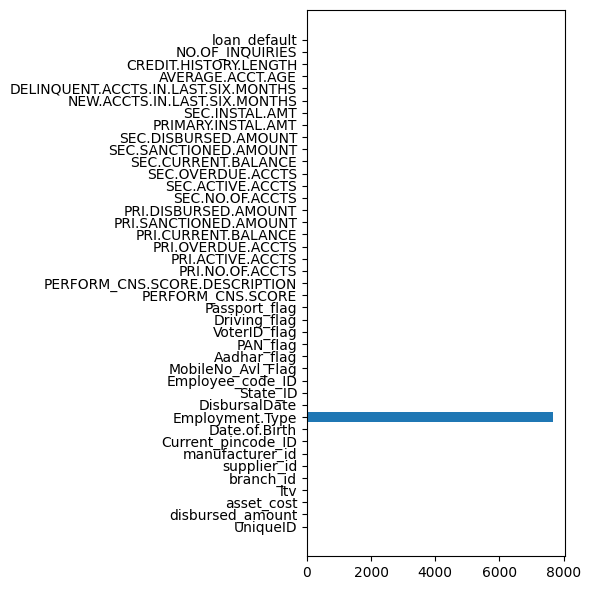

In [132]:
plt.figure(figsize = (6,6),dpi = 100)
plt.barh(df_new.isnull().sum().index, width = df_new.isnull().sum().values)
plt.tight_layout()

## Data Type Cleaning

In [133]:
df_new['Passport_flag'] = df_new['Passport_flag'].astype('object')
df_new['loan_default'] = df_new['loan_default'].astype('object')

In [134]:
df_new['PERFORM_CNS.SCORE.DESCRIPTION'].value_counts()

No Bureau History Available                                116950
C-Very Low Risk                                             16045
A-Very Low Risk                                             14124
D-Very Low Risk                                             11358
B-Very Low Risk                                              9201
M-Very High Risk                                             8776
F-Low Risk                                                   8485
K-High Risk                                                  8277
H-Medium Risk                                                6855
E-Low Risk                                                   5821
I-Medium Risk                                                5557
G-Low Risk                                                   3988
Not Scored: Sufficient History Not Available                 3765
J-High Risk                                                  3748
Not Scored: Not Enough Info available on the customer        3672
Not Scored

In [135]:
k = df_new['PERFORM_CNS.SCORE.DESCRIPTION'].value_counts().index
v = range(len(k))
dt = {}
dt.update(zip(k,v)) 
df_new['encoded_cns_score_desc'] = df_new['PERFORM_CNS.SCORE.DESCRIPTION'].map(dt)
df_new.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,encoded_cns_score_desc
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0.000000,0.000000,0,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,1991,0,0,1,1.916667,1.916667,0,1,10
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0.000000,0.000000,0,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,31,0,0,0,0.666667,1.250000,1,1,17
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0.000000,0.000000,1,1,0


In [136]:
df_new['PERFORM_CNS.SCORE.DESCRIPTION'].head()

0    No Bureau History Available
1                  I-Medium Risk
2    No Bureau History Available
3               L-Very High Risk
4    No Bureau History Available
Name: PERFORM_CNS.SCORE.DESCRIPTION, dtype: object

In [137]:
df_new.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default', 'encoded_cns_score_desc'],
      dtype='object')

In [138]:
df_new['MobileNo_Avl_Flag'] = df_new['MobileNo_Avl_Flag'].astype('object')
df_new['Aadhar_flag'] = df_new['Aadhar_flag'].astype('object')
df_new['PAN_flag'] = df_new['PAN_flag'].astype('object')
df_new['VoterID_flag'] = df_new['VoterID_flag'].astype('object')
df_new['Driving_flag'] = df_new['Driving_flag'].astype('object')

In [139]:
df_new.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,encoded_cns_score_desc
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0.000000,0.000000,0,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,1991,0,0,1,1.916667,1.916667,0,1,10
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0.000000,0.000000,0,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,31,0,0,0,0.666667,1.250000,1,1,17
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0.000000,0.000000,1,1,0


In [140]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 42 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UniqueID                             233154 non-null  int64  
 1   disbursed_amount                     233154 non-null  int64  
 2   asset_cost                           233154 non-null  int64  
 3   ltv                                  233154 non-null  float64
 4   branch_id                            233154 non-null  int64  
 5   supplier_id                          233154 non-null  int64  
 6   manufacturer_id                      233154 non-null  int64  
 7   Current_pincode_ID                   233154 non-null  int64  
 8   Date.of.Birth                        233154 non-null  object 
 9   Employment.Type                      225493 non-null  object 
 10  DisbursalDate                        233154 non-null  object 
 11  State_ID     

In [141]:
import datetime as dt

In [39]:
df_new['Date.of.Birth'] = pd.to_datetime(df_new['Date.of.Birth'], format = "%d-%m-%y")

In [ ]:
now = pd.Timestamp('now')

In [ ]:
df_new['age'] = (now - df_new['Date.of.Birth'])

In [ ]:
df_new['age']  = df_new['age'].astype(str)

In [ ]:
df_new[['age','age_waste']] = df_new['age'].str.split("days",expand=True)
df_new['age']= df_new['age'].astype(str).astype(int)

In [ ]:
df_new = df_new.drop(['age_waste'],axis = 1)

In [ ]:
df_new.head()

In [ ]:
df_new.shape

In [ ]:
df_new.info()

## Missing Values Treatment

In [142]:
df_new.isnull().sum()

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

In [143]:
df_new.shape

(233154, 42)

In [144]:
df_new = df_new.dropna(axis = 0)
df_new.shape

(225493, 42)

In [145]:
df_new.isnull().sum()

UniqueID                               0
disbursed_amount                       0
asset_cost                             0
ltv                                    0
branch_id                              0
supplier_id                            0
manufacturer_id                        0
Current_pincode_ID                     0
Date.of.Birth                          0
Employment.Type                        0
DisbursalDate                          0
State_ID                               0
Employee_code_ID                       0
MobileNo_Avl_Flag                      0
Aadhar_flag                            0
PAN_flag                               0
VoterID_flag                           0
Driving_flag                           0
Passport_flag                          0
PERFORM_CNS.SCORE                      0
PERFORM_CNS.SCORE.DESCRIPTION          0
PRI.NO.OF.ACCTS                        0
PRI.ACTIVE.ACCTS                       0
PRI.OVERDUE.ACCTS                      0
PRI.CURRENT.BALA

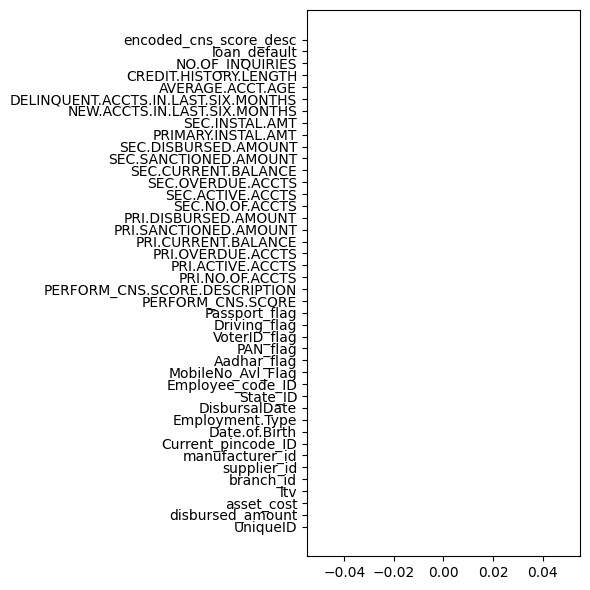

In [146]:
plt.figure(figsize = (6,6),dpi = 100)
plt.barh(df_new.isnull().sum().index, width = df_new.isnull().sum().values)
plt.tight_layout()

## Outlier Treatment

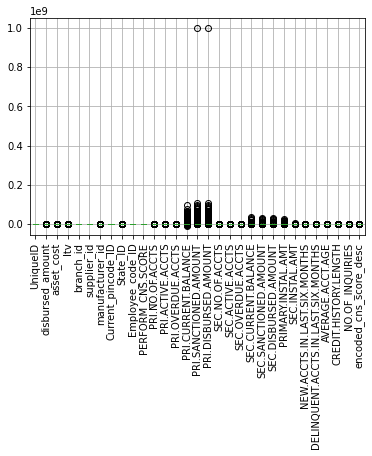

In [147]:
df_new.boxplot()
plt.xticks(rotation = 90)
plt.show()

In [148]:
df_new.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default', 'encoded_cns_score_desc'],
      dtype='object')

In [149]:
df_new[['PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT']].skew()

PRI.CURRENT.BALANCE       29.256247
PRI.SANCTIONED.AMOUNT    319.533663
PRI.DISBURSED.AMOUNT     318.400468
dtype: float64

In [150]:
from scipy.stats import zscore

In [118]:
df_new['PRI.CURRENT.BALANCE'] = np.log(df_new['PRI.CURRENT.BALANCE'] + 0.2)

C:\Users\Tusha\Anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [119]:
df_new['PRI.SANCTIONED.AMOUNT'] = np.log(df_new['PRI.SANCTIONED.AMOUNT'] + 0.2)

In [120]:
df_new['PRI.DISBURSED.AMOUNT'] = np.log(df_new['PRI.DISBURSED.AMOUNT'] + 0.2)

In [121]:
df_new[['PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT']].skew()

PRI.CURRENT.BALANCE      0.547367
PRI.SANCTIONED.AMOUNT    0.439106
PRI.DISBURSED.AMOUNT     0.444259
dtype: float64

In [122]:
df_new[['SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT']].skew()

SEC.CURRENT.BALANCE      107.009186
SEC.SANCTIONED.AMOUNT     74.216893
SEC.DISBURSED.AMOUNT      74.719858
dtype: float64

In [123]:
df_new['SEC.CURRENT.BALANCE'] = np.log(df_new['SEC.CURRENT.BALANCE'] + 0.2)

In [124]:
df_new['SEC.SANCTIONED.AMOUNT'] = np.log(df_new['SEC.SANCTIONED.AMOUNT'] + 0.2)

In [125]:
df_new['SEC.DISBURSED.AMOUNT'] = np.log(df_new['SEC.DISBURSED.AMOUNT'] + 0.2)

In [126]:
df_new[['SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT']].skew()

SEC.CURRENT.BALANCE      8.495240
SEC.SANCTIONED.AMOUNT    7.857054
SEC.DISBURSED.AMOUNT     7.910517
dtype: float64

In [127]:
df_new[['SEC.INSTAL.AMT', 'PRIMARY.INSTAL.AMT']].skew()

SEC.INSTAL.AMT        152.845707
PRIMARY.INSTAL.AMT     71.525312
dtype: float64

In [128]:
df_new['PRIMARY.INSTAL.AMT'] = np.log(df_new['PRIMARY.INSTAL.AMT'] + 0.2)

In [129]:
df_new['SEC.INSTAL.AMT'] = np.log(df_new['SEC.INSTAL.AMT'] + 0.2)

In [130]:
df_new[['SEC.INSTAL.AMT', 'PRIMARY.INSTAL.AMT']].skew()

SEC.INSTAL.AMT        10.429684
PRIMARY.INSTAL.AMT     0.883232
dtype: float64

In [131]:
df_new[['disbursed_amount', 'asset_cost']].skew()

disbursed_amount    3.069300
asset_cost          4.055664
dtype: float64

In [132]:
df_new['disbursed_amount'] = np.log(df_new['disbursed_amount'] + 0.2)

In [133]:
df_new['asset_cost'] = np.log(df_new['asset_cost'] + 0.2)

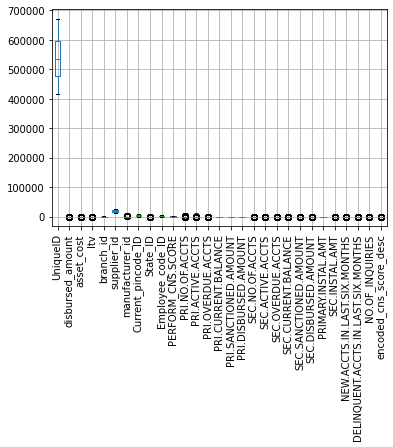

In [134]:
df_new.boxplot()
plt.xticks(rotation = 90)
plt.show()

In [151]:
df_new.shape

(225493, 42)

In [152]:
df_new.isnull().sum()

UniqueID                               0
disbursed_amount                       0
asset_cost                             0
ltv                                    0
branch_id                              0
supplier_id                            0
manufacturer_id                        0
Current_pincode_ID                     0
Date.of.Birth                          0
Employment.Type                        0
DisbursalDate                          0
State_ID                               0
Employee_code_ID                       0
MobileNo_Avl_Flag                      0
Aadhar_flag                            0
PAN_flag                               0
VoterID_flag                           0
Driving_flag                           0
Passport_flag                          0
PERFORM_CNS.SCORE                      0
PERFORM_CNS.SCORE.DESCRIPTION          0
PRI.NO.OF.ACCTS                        0
PRI.ACTIVE.ACCTS                       0
PRI.OVERDUE.ACCTS                      0
PRI.CURRENT.BALA

In [153]:
df_new = df_new.dropna(axis = 0)
df_new.shape

(225493, 42)

In [154]:
df_new.isnull().sum()

UniqueID                               0
disbursed_amount                       0
asset_cost                             0
ltv                                    0
branch_id                              0
supplier_id                            0
manufacturer_id                        0
Current_pincode_ID                     0
Date.of.Birth                          0
Employment.Type                        0
DisbursalDate                          0
State_ID                               0
Employee_code_ID                       0
MobileNo_Avl_Flag                      0
Aadhar_flag                            0
PAN_flag                               0
VoterID_flag                           0
Driving_flag                           0
Passport_flag                          0
PERFORM_CNS.SCORE                      0
PERFORM_CNS.SCORE.DESCRIPTION          0
PRI.NO.OF.ACCTS                        0
PRI.ACTIVE.ACCTS                       0
PRI.OVERDUE.ACCTS                      0
PRI.CURRENT.BALA

In [155]:
# 496 rows are dropped that contains the null values

## Duplicates Detection

In [156]:
dup = []
cl = []
for i in df:
    dup.append(df.duplicated(subset = i, keep = 'first').sum()/df.shape[0]*100)
    cl.append(i)

In [157]:
dup_ser = pd.Series(dup, index = cl)
dup_ser

UniqueID                                0.000000
disbursed_amount                       89.464045
asset_cost                             80.162468
ltv                                    97.178260
branch_id                              99.964830
supplier_id                            98.733455
manufacturer_id                        99.995282
Current_pincode_ID                     97.127221
Date.of.Birth                          93.380770
Employment.Type                        99.998713
DisbursalDate                          99.963972
State_ID                               99.990564
Employee_code_ID                       98.597494
MobileNo_Avl_Flag                      99.999571
Aadhar_flag                            99.999142
PAN_flag                               99.999142
VoterID_flag                           99.999142
Driving_flag                           99.999142
Passport_flag                          99.999142
PERFORM_CNS.SCORE                      99.754240
PERFORM_CNS.SCORE.DE

In [158]:
df_new['encoded_cns_score_desc'] = df_new['encoded_cns_score_desc'].astype('object')

In [159]:
df_new.select_dtypes(exclude = 'object').columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'State_ID',
       'Employee_code_ID', 'PERFORM_CNS.SCORE', 'PRI.NO.OF.ACCTS',
       'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE',
       'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS',
       'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE',
       'SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT',
       'SEC.INSTAL.AMT', 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
       'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'AVERAGE.ACCT.AGE',
       'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES'],
      dtype='object')

In [160]:
df_new.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,encoded_cns_score_desc
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0.000000,0.000000,0,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,1991,0,0,1,1.916667,1.916667,0,1,10
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0.000000,0.000000,0,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,31,0,0,0,0.666667,1.250000,1,1,17
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0.000000,0.000000,1,1,0


In [161]:
features = df[['UniqueID', 'disbursed_amount','branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID','State_ID', 'Date.of.Birth','Employee_code_ID','loan_default']]

In [162]:
features.head()

,UniqueID,disbursed_amount,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Date.of.Birth,Employee_code_ID,loan_default
0,420825,50578,67,22807,45,1441,6,01-01-84,1998,0
1,537409,47145,67,22807,45,1502,6,31-07-85,1998,1
2,417566,53278,67,22807,45,1497,6,24-08-85,1998,0
3,624493,57513,67,22807,45,1501,6,30-12-93,1998,1
4,539055,52378,67,22807,45,1495,6,09-12-77,1998,1


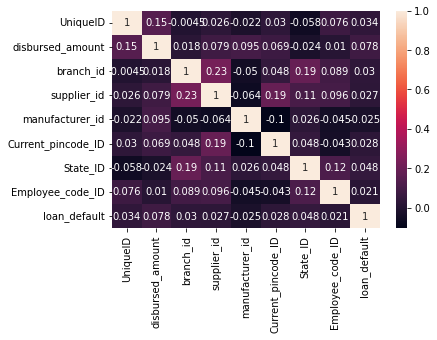

In [163]:
sns.heatmap(features.corr(),annot =True)
plt.show()

As we can see all these features:
'UniqueID', 'disbursed_amount','branch_id','supplier_id', 'manufacturer_id', 'Current_pincode_ID','State_ID','Employee_code_ID','Date.of.Birth','DisbursalDate'
are irrelevant features (noise) and doesn't contribute anything in the loan default prediction. So we can remove these unnecessary features from our dataset.

In [164]:
df_new2 = df_new.drop(['UniqueID', 'disbursed_amount','branch_id','supplier_id', 'manufacturer_id', 'Current_pincode_ID','State_ID','Employee_code_ID','Date.of.Birth','DisbursalDate'],axis = 1).copy()

In [165]:
df_new2.head()

,asset_cost,ltv,Employment.Type,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,...,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,encoded_cns_score_desc
0,58400,89.55,Salaried,1,1,0,0,0,0,0,...,0,0,0,0,0,0.000000,0.000000,0,0,0
1,65550,73.23,Self employed,1,1,0,0,0,0,598,...,0,1991,0,0,1,1.916667,1.916667,0,1,10
2,61360,89.63,Self employed,1,1,0,0,0,0,0,...,0,0,0,0,0,0.000000,0.000000,0,0,0
3,66113,88.48,Self employed,1,1,0,0,0,0,305,...,0,31,0,0,0,0.666667,1.250000,1,1,17
4,60300,88.39,Self employed,1,1,0,0,0,0,0,...,0,0,0,0,0,0.000000,0.000000,1,1,0


In [166]:
df_new2.shape

(225493, 32)

In [167]:
df_new2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225493 entries, 0 to 233153
Data columns (total 32 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   asset_cost                           225493 non-null  int64  
 1   ltv                                  225493 non-null  float64
 2   Employment.Type                      225493 non-null  object 
 3   MobileNo_Avl_Flag                    225493 non-null  object 
 4   Aadhar_flag                          225493 non-null  object 
 5   PAN_flag                             225493 non-null  object 
 6   VoterID_flag                         225493 non-null  object 
 7   Driving_flag                         225493 non-null  object 
 8   Passport_flag                        225493 non-null  object 
 9   PERFORM_CNS.SCORE                    225493 non-null  int64  
 10  PERFORM_CNS.SCORE.DESCRIPTION        225493 non-null  object 
 11  PRI.NO.OF.ACC

we also see that we already label encode PERFORM_CNS.SCORE.DESCRIPTION to new feature encoded_cns_score_desc.
Therefore, this feature also becomes redundant and we can remove that feature too from our dataset

In [168]:
df_new2 = df_new2.drop('PERFORM_CNS.SCORE.DESCRIPTION', axis = 1)


In [172]:
df_new2[['AVERAGE.ACCT.AGE','CREDIT.HISTORY.LENGTH']]

,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH
0,0.000000,0.000000
1,1.916667,1.916667
2,0.000000,0.000000
3,0.666667,1.250000
4,0.000000,0.000000
...,...,...
233149,1.750000,3.250000
233150,0.500000,0.500000
233151,0.000000,0.000000
233152,0.000000,0.000000


In [169]:
df_new2[['AVERAGE_ACCT_Year','AVERAGE_ACCT_Month']] = df_new2['AVERAGE.ACCT.AGE'].str.split("yrs",expand=True)
df_new2[['AVERAGE_ACCT_Month','AVERAGE_ACCT_newMonth']] = df_new2['AVERAGE_ACCT_Month'].str.split("mon",expand=True)
df_new2["AVERAGE.ACCT.AGE"]= df_new2["AVERAGE_ACCT_Year"].astype(str).astype(int)+((df_new2["AVERAGE_ACCT_Month"].astype(str).astype(int))/12)
df_new2 = df_new2.drop(columns= ["AVERAGE_ACCT_Year","AVERAGE_ACCT_Month",'AVERAGE_ACCT_newMonth'])

AttributeError: Can only use .str accessor with string values!

In [59]:
df_new2[['CREDIT_HISTORY_LENGTH_Year','CREDIT_HISTORY_LENGTH_Month']] = df_new2['CREDIT.HISTORY.LENGTH'].str.split("yrs",expand=True)
df_new2[['CREDIT_HISTORY_LENGTH_Month','CREDIT_HISTORY_LENGTH_Month1']] = df_new2['CREDIT_HISTORY_LENGTH_Month'].str.split("mon",expand=True)
df_new2["CREDIT.HISTORY.LENGTH"]= df_new2["CREDIT_HISTORY_LENGTH_Year"].astype(str).astype(int)+((df_new2["CREDIT_HISTORY_LENGTH_Month"].astype(str).astype(int))/12)
df_new2 = df_new2.drop(columns= ["CREDIT_HISTORY_LENGTH_Year","CREDIT_HISTORY_LENGTH_Month",'CREDIT_HISTORY_LENGTH_Month1'])


In [60]:
df_new2['Employment.Type'] = pd.get_dummies(df_new2['Employment.Type'], drop_first = True)

In [173]:
df_new2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225493 entries, 0 to 233153
Data columns (total 31 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   asset_cost                           225493 non-null  int64  
 1   ltv                                  225493 non-null  float64
 2   Employment.Type                      225493 non-null  object 
 3   MobileNo_Avl_Flag                    225493 non-null  object 
 4   Aadhar_flag                          225493 non-null  object 
 5   PAN_flag                             225493 non-null  object 
 6   VoterID_flag                         225493 non-null  object 
 7   Driving_flag                         225493 non-null  object 
 8   Passport_flag                        225493 non-null  object 
 9   PERFORM_CNS.SCORE                    225493 non-null  int64  
 10  PRI.NO.OF.ACCTS                      225493 non-null  int64  
 11  PRI.ACTIVE.AC

## Spliiting the Dataset into Train and Test sets

In [174]:
from sklearn.model_selection import train_test_split
import statsmodels
import statsmodels.api as sm

In [175]:
x = df_new2.drop('loan_default',axis = 1)
y = df_new2['loan_default']
x.shape

(225493, 30)

In [176]:
train_x,test_x, train_y, test_y = train_test_split(x,y, random_state = 10, test_size = 0.3, stratify = y)

In [177]:
x.head()

,asset_cost,ltv,Employment.Type,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,encoded_cns_score_desc
0,58400,89.55,Salaried,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0.000000,0.000000,0,0
1,65550,73.23,Self employed,1,1,0,0,0,0,598,...,0,0,1991,0,0,1,1.916667,1.916667,0,10
2,61360,89.63,Self employed,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0.000000,0.000000,0,0
3,66113,88.48,Self employed,1,1,0,0,0,0,305,...,0,0,31,0,0,0,0.666667,1.250000,1,17
4,60300,88.39,Self employed,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0.000000,0.000000,1,0


In [178]:
trainx.reset_index(drop = True, inplace = True)
trainy.reset_index(drop = True, inplace = True)
testx.reset_index(drop = True, inplace = True)
testy.reset_index(drop = True, inplace = True)

In [179]:
print(trainx.index)
print(trainy.index)
print(testx.index)
print(testy.index)

RangeIndex(start=0, stop=163207, step=1)
RangeIndex(start=0, stop=163207, step=1)
RangeIndex(start=0, stop=69947, step=1)
RangeIndex(start=0, stop=69947, step=1)


## Data Preprocessing

In [180]:
train_num = train_x.select_dtypes(include = 'number')
test_num = test_x.select_dtypes(include = 'number')

In [181]:
col_train = train_num.columns
col_test = test_num.columns

In [182]:
from sklearn.preprocessing import StandardScaler

In [183]:
sc = StandardScaler()
train_num = sc.fit_transform(train_num)
test_num = sc.transform(test_num)

In [184]:
train_num = pd.DataFrame(train_num, columns = col_train)
test_num = pd.DataFrame(test_num, columns = col_test)


In [185]:
train_cat = train_x.select_dtypes(include = 'object')
test_cat = test_x.select_dtypes(include = 'object')

In [186]:
train_cat.columns

Index(['Employment.Type', 'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag',
       'VoterID_flag', 'Driving_flag', 'Passport_flag',
       'encoded_cns_score_desc'],
      dtype='object')

In [187]:
train_cat['Employment.Type'] = pd.get_dummies(train_cat['Employment.Type'],drop_first = True)

C:\Users\Tusha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [188]:
train_cat['Employment.Type'].value_counts()

1    89277
0    68568
Name: Employment.Type, dtype: int64

In [189]:
test_cat['Employment.Type'].value_counts()

Self employed    38358
Salaried         29290
Name: Employment.Type, dtype: int64

In [190]:
test_cat['Employment.Type'] = pd.get_dummies(test_cat['Employment.Type'],drop_first = True)

C:\Users\Tusha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [191]:
test_cat['Employment.Type'].value_counts()

1    38358
0    29290
Name: Employment.Type, dtype: int64

In [192]:
train_num.index

RangeIndex(start=0, stop=157845, step=1)

In [193]:
train_cat.index

Int64Index([ 63091,   6073, 126441,  80600, 137610, 133855,   3707,  16010,
            112536, 198563,
            ...
             23374,  89444, 163694,  48444, 139939, 112041, 173280, 138913,
            118140,  88225],
           dtype='int64', length=157845)

In [194]:
# As we can see that index in train_num are seriazed values from 0 to 180394 but in train_cat index values are not serialized.
# Therefore, we have to reset their indices and drop their previous index to concat them correctly into train_x

In [195]:
train_num.reset_index(drop = True, inplace = True)
train_cat.reset_index(drop = True, inplace = True)

In [196]:
train_num.index

RangeIndex(start=0, stop=157845, step=1)

In [197]:
train_cat.index

RangeIndex(start=0, stop=157845, step=1)

In [198]:
# Now you can see that their indices are serialized and thereby, they can now concat correctly without adding
# any NAs in the train_x

In [199]:
train_x = pd.concat([train_num, train_cat], axis = 1)

In [200]:
train_x.shape

(157845, 30)

In [201]:
# As you can see their shape remains unchanged

In [202]:
train_x.head()

,asset_cost,ltv,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,...,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,Employment.Type,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,encoded_cns_score_desc
0,0.155341,1.035350,-0.863802,-0.478054,-0.537243,-0.286015,-0.178379,-0.186153,-0.184560,-0.096047,...,-0.573321,-0.296122,1,1,1,0,0,0,0,0
1,0.183708,0.432044,-0.863802,-0.478054,-0.537243,-0.286015,-0.178379,-0.186153,-0.184560,-0.096047,...,-0.573321,2.531039,1,1,1,0,0,0,0,0
2,0.059434,0.412809,1.045898,1.078192,0.483228,-0.286015,-0.067478,-0.100305,-0.099359,-0.096047,...,4.849643,-0.296122,1,1,1,0,0,0,0,11
3,-0.410643,0.891081,-0.863802,-0.478054,-0.537243,-0.286015,-0.178379,-0.186153,-0.184560,-0.096047,...,-0.573321,-0.296122,0,1,1,1,0,0,0,0
4,-0.541724,-0.274435,0.461476,1.467253,1.503699,1.509340,-0.056402,0.040228,-0.049623,-0.096047,...,14.226121,-0.296122,1,1,1,0,0,0,0,7


In [203]:
train_x.isnull().sum()

asset_cost                             0
ltv                                    0
PERFORM_CNS.SCORE                      0
PRI.NO.OF.ACCTS                        0
PRI.ACTIVE.ACCTS                       0
PRI.OVERDUE.ACCTS                      0
PRI.CURRENT.BALANCE                    0
PRI.SANCTIONED.AMOUNT                  0
PRI.DISBURSED.AMOUNT                   0
SEC.NO.OF.ACCTS                        0
SEC.ACTIVE.ACCTS                       0
SEC.OVERDUE.ACCTS                      0
SEC.CURRENT.BALANCE                    0
SEC.SANCTIONED.AMOUNT                  0
SEC.DISBURSED.AMOUNT                   0
PRIMARY.INSTAL.AMT                     0
SEC.INSTAL.AMT                         0
NEW.ACCTS.IN.LAST.SIX.MONTHS           0
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS    0
AVERAGE.ACCT.AGE                       0
CREDIT.HISTORY.LENGTH                  0
NO.OF_INQUIRIES                        0
Employment.Type                        0
MobileNo_Avl_Flag                      0
Aadhar_flag     

In [204]:
test_num.index

RangeIndex(start=0, stop=67648, step=1)

In [205]:
test_cat.index

Int64Index([119642, 210492, 163176,  43258,  94547,  41433,  10493, 202704,
             43858,  96618,
            ...
             42856,    313,  56727,  45591, 132891,  78865, 189333, 189276,
             54787,  93868],
           dtype='int64', length=67648)

In [206]:
# As we can see that index in test_num are seriazed values from 0 to 45099 but in test_cat index values are not serialized.
# Therefore, we have to reset their indices and drop their previous index to concat them correctly into test_x

In [207]:
test_num.reset_index(drop = True, inplace = True)
test_cat.reset_index(drop = True, inplace = True)

In [208]:
test_num.index

RangeIndex(start=0, stop=67648, step=1)

In [209]:
test_cat.index

RangeIndex(start=0, stop=67648, step=1)

In [210]:
# Now you can see that their indices are serialized and thereby, they can now concat correctly without adding
# any NAs in the test_x

In [211]:
test_x = pd.concat([test_num, test_cat], axis = 1)

In [212]:
test_x.shape

(67648, 30)

In [213]:
test_x.isnull().sum()

asset_cost                             0
ltv                                    0
PERFORM_CNS.SCORE                      0
PRI.NO.OF.ACCTS                        0
PRI.ACTIVE.ACCTS                       0
PRI.OVERDUE.ACCTS                      0
PRI.CURRENT.BALANCE                    0
PRI.SANCTIONED.AMOUNT                  0
PRI.DISBURSED.AMOUNT                   0
SEC.NO.OF.ACCTS                        0
SEC.ACTIVE.ACCTS                       0
SEC.OVERDUE.ACCTS                      0
SEC.CURRENT.BALANCE                    0
SEC.SANCTIONED.AMOUNT                  0
SEC.DISBURSED.AMOUNT                   0
PRIMARY.INSTAL.AMT                     0
SEC.INSTAL.AMT                         0
NEW.ACCTS.IN.LAST.SIX.MONTHS           0
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS    0
AVERAGE.ACCT.AGE                       0
CREDIT.HISTORY.LENGTH                  0
NO.OF_INQUIRIES                        0
Employment.Type                        0
MobileNo_Avl_Flag                      0
Aadhar_flag     

In [214]:
# As you can see their shape remains unchanged

In [215]:
test_x.head()

,asset_cost,ltv,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,...,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,Employment.Type,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,encoded_cns_score_desc
0,-0.762877,0.570193,-0.863802,-0.478054,-0.537243,-0.286015,-0.178379,-0.186153,-0.184560,-0.096047,...,-0.573321,-0.296122,1,1,1,0,0,0,0,0
1,-0.231203,-0.349630,0.880607,0.105538,0.483228,-0.286015,0.182775,0.200230,0.198913,-0.096047,...,0.056443,-0.296122,0,1,1,0,0,0,0,10
2,2.020792,0.383955,-0.863802,-0.478054,-0.537243,-0.286015,-0.178379,-0.186153,-0.184560,-0.096047,...,-0.573321,-0.296122,0,1,1,0,0,0,0,0
3,0.345803,1.242573,0.021685,-0.283524,-0.027008,1.509340,0.329740,0.242599,0.240963,-0.096047,...,1.106049,-0.296122,0,1,1,0,0,0,0,5
4,-0.229312,-1.394486,1.146253,-0.088993,-0.027008,1.509340,-0.172378,-0.161885,-0.160476,-0.096047,...,0.371324,-0.296122,1,1,1,1,0,0,0,9


In [216]:
train_x.shape

(157845, 30)

In [217]:
train_y.value_counts()

0    123568
1     34277
Name: loan_default, dtype: int64

In [218]:
train_x.columns

Index(['asset_cost', 'ltv', 'PERFORM_CNS.SCORE', 'PRI.NO.OF.ACCTS',
       'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE',
       'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS',
       'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE',
       'SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT',
       'SEC.INSTAL.AMT', 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
       'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'AVERAGE.ACCT.AGE',
       'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES', 'Employment.Type',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'encoded_cns_score_desc'],
      dtype='object')

In [219]:
train_x['Employment.Type']

0         1
1         1
2         1
3         0
4         1
         ..
157840    1
157841    1
157842    0
157843    0
157844    1
Name: Employment.Type, Length: 157845, dtype: uint8

In [220]:
test_x['Employment.Type']

0        1
1        0
2        0
3        0
4        1
        ..
67643    1
67644    1
67645    0
67646    0
67647    1
Name: Employment.Type, Length: 67648, dtype: uint8

## USING SMOTE to balance the class distribution in the target variable

In [221]:
from imblearn.over_sampling import SMOTE

In [222]:
sm = SMOTE()

In [223]:
train_x, train_y = sm.fit_resample(train_x, train_y.astype('int'))

In [224]:
train_y.value_counts()

1    123568
0    123568
Name: loan_default, dtype: int64

In [225]:
train_x.shape

(247136, 30)

In [226]:
test_x.shape

(67648, 30)

In [227]:
train_x.isnull().sum()

asset_cost                             0
ltv                                    0
PERFORM_CNS.SCORE                      0
PRI.NO.OF.ACCTS                        0
PRI.ACTIVE.ACCTS                       0
PRI.OVERDUE.ACCTS                      0
PRI.CURRENT.BALANCE                    0
PRI.SANCTIONED.AMOUNT                  0
PRI.DISBURSED.AMOUNT                   0
SEC.NO.OF.ACCTS                        0
SEC.ACTIVE.ACCTS                       0
SEC.OVERDUE.ACCTS                      0
SEC.CURRENT.BALANCE                    0
SEC.SANCTIONED.AMOUNT                  0
SEC.DISBURSED.AMOUNT                   0
PRIMARY.INSTAL.AMT                     0
SEC.INSTAL.AMT                         0
NEW.ACCTS.IN.LAST.SIX.MONTHS           0
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS    0
AVERAGE.ACCT.AGE                       0
CREDIT.HISTORY.LENGTH                  0
NO.OF_INQUIRIES                        0
Employment.Type                        0
MobileNo_Avl_Flag                      0
Aadhar_flag     

In [228]:
test_x.index

RangeIndex(start=0, stop=67648, step=1)

In [229]:
test_y.reset_index(drop = True, inplace = True)

In [230]:
test_y.index

RangeIndex(start=0, stop=67648, step=1)

In [231]:
test_y = test_y.astype('int')

In [232]:
train_y = train_y.astype('int')

In [233]:
train_x.index

RangeIndex(start=0, stop=247136, step=1)

In [234]:
train_y.index

RangeIndex(start=0, stop=247136, step=1)

## Base Model Preparation

### Logistic Regression

In [235]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE

In [236]:
logrg = LogisticRegression()


In [237]:
#test

In [238]:
ypred_prob = logrg.fit(train_x, train_y).predict(test_x)

C:\Users\Tusha\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [239]:
pd.Series(ypred_prob).value_counts()

0    33913
1    33735
dtype: int64

In [240]:
ypred = [0 if x < 0.5 else 1 for x in ypred_prob]

In [241]:
test_y.value_counts()

0    52958
1    14690
Name: loan_default, dtype: int64

In [242]:
pd.Series(ypred_prob).value_counts()

0    33913
1    33735
dtype: int64

In [243]:
# changing the data type of target variable to int32 to avoid any classification error due to mix of continuous 
# multi outputs and binary targets

In [244]:
test_y = test_y.astype('int')

In [245]:
ypred_prob.dtype

dtype('int32')

In [246]:
test_y.dtype

dtype('int32')

In [247]:
test_y.head()

0    0
1    1
2    0
3    1
4    0
Name: loan_default, dtype: int32

In [248]:
cm_lr = confusion_matrix(test_y, ypred_prob)
print(cm_lr)

[[28576 24382]
 [ 5337  9353]]


In [249]:
TN = cm_lr[0,0]

TP = cm_lr[1,1]

FP = cm_lr[0,1]

FN = cm_lr[1,0]

In [250]:
# precision
precision_lr = TP/(TP+FP)

# print the value
precision_lr

0.277249147769379

In [251]:
# recall(true positive rate)
recall_lr = TP/(TP+FN)

# print the value
recall_lr

0.6366916269571137

In [252]:
# specificity (True negative rate)
specificity_lr = TN/(TN+FP)

# print the value
specificity_lr

0.5395974168208769

In [253]:
f1_score_lr = 2*((precision_lr*recall_lr)/(precision_lr+recall_lr))

# print the f1_score
f1_score_lr

0.3862880743417656

In [254]:
accuracy_lr = (TN+TP)/(TN+FP+FN+TP)

# print the accuracy
accuracy_lr

0.5606817644276254

In [255]:
cr_lr = classification_report(test_y, ypred_prob)
print(cr_lr)

              precision    recall  f1-score   support

           0       0.84      0.54      0.66     52958
           1       0.28      0.64      0.39     14690

    accuracy                           0.56     67648
   macro avg       0.56      0.59      0.52     67648
weighted avg       0.72      0.56      0.60     67648



In [ ]:
ypred_prob_train = logrg.fit(train_x, train_y).predict(train_x)

In [ ]:
pd.Series(ypred_prob_train).value_counts()

In [ ]:
round(accuracy_score(train_y,ypred_prob_train),2)

In [ ]:
round(accuracy_score(test_y,ypred_prob),2)

In [ ]:
a = 

## KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_classification = KNeighborsClassifier(n_neighbors=2, n_jobs=-1)

In [ ]:
knn_model = knn_classification.fit(train_x, train_y)

In [ ]:
ypred_knn = knn_model.predict(test_x)

In [ ]:
ypred_knn

In [ ]:
cr_k = classification_report(test_y, ypred_knn)
print(cr_k)

In [ ]:
cm_k = confusion_matrix(test_y, ypred_knn)
print(cm_k)

In [ ]:
TN2 = cm_k[0,0]

TP2 = cm_k[1,1]

FP2 = cm_k[0,1]

FN2 = cm_k[1,0]

In [ ]:
# precision
precision_knn = TP2/ (TP2+FP2)

# print the value
precision_knn

In [ ]:
# recall(true positive rate)
recall_knn = TP2/ (TP2+FN2)

# print the value
recall_knn

In [ ]:
# specificity (True negative rate)
specificity_knn = TN2/ (TN2+FP2)

# print the value
specificity_knn

In [ ]:
f1_score_knn = 2*((precision_knn*recall_knn)/(precision_knn+recall_knn))

# print the f1_score
f1_score_knn

In [ ]:
accuracy_knn = (TN2+TP2)/(TN2+FP2+FN2+TP2)

# print the accuracy
accuracy_knn

In [ ]:
print("Balanced Accuracy Score ",balanced_accuracy_score(test_y, ypred_knn))

## Random Forest Classifier

In [113]:
from sklearn.ensemble import RandomForestClassifier

In [114]:
rf_classification = RandomForestClassifier(n_estimators = 100, random_state = 10)

In [115]:
train_x.shape

(247136, 30)

In [116]:
train_y.shape

(247136,)

In [117]:
test_x.shape

(67648, 30)

In [118]:
test_y.shape

(67648,)

In [121]:
#test data

In [119]:
rf_model = rf_classification.fit(train_x, train_y)

In [120]:
ypred_rf = rf_model.predict(test_x)

In [122]:
print(classification_report(test_y, ypred_rf))

              precision    recall  f1-score   support

           0       0.80      0.81      0.80     52958
           1       0.28      0.27      0.27     14690

    accuracy                           0.69     67648
   macro avg       0.54      0.54      0.54     67648
weighted avg       0.69      0.69      0.69     67648



In [123]:
cm_rf = confusion_matrix(test_y, ypred_rf)
print(cm_rf)

[[42717 10241]
 [10732  3958]]


In [124]:
TN3 = cm_rf[0,0]

TP3 = cm_rf[1,1]

FP3 = cm_rf[0,1]

FN3 = cm_rf[1,0]

In [125]:
# precision
precision_rf = TP3/(TP3+FP3)

# print the value
precision_rf

0.2787520247904782

In [126]:
# recall(true positive rate)
recall_rf = TP3/(TP3+FN3)

# print the value
recall_rf

0.26943498978897207

In [127]:
# specificity (True negative rate)
specificity_rf = TN3/(TN3+FP3)

# print the value
specificity_rf

0.8066203406473054

In [128]:
f1_score_rf = 2*((precision_rf*recall_rf)/(precision_rf+recall_rf))

# print the f1_score
f1_score_rf

0.27401433071411263

In [129]:
accuracy_rf = (TN3+TP3)/(TN3+FP3+FN3+TP3)

# print the accuracy
accuracy_rf

0.6899686613055819

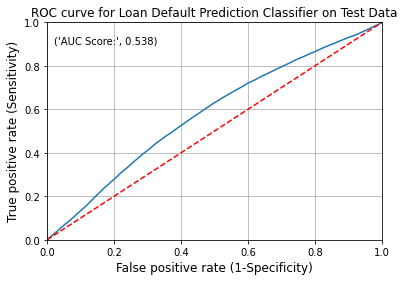

In [135]:
y_pred_prob = rf_classification.predict_proba(test_x)[:,1]
    
    # the roc_curve() returns the values for false positive rate, true positive rate and threshold
    # pass the actual target values and predicted probabilities to the function
fpr, tpr, thresholds = roc_curve(test_y, y_pred_prob)

    # plot the ROC curve
plt.plot(fpr, tpr)

    # set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Loan Default Prediction Classifier on Test Data', fontsize = 12)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 12)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 12)

    # add the AUC score to the plot
    # 'x' and 'y' gives position of the text
    # 's' is the text 
    # use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(test_y, ypred_rf),4)))

    # plot the grid
plt.grid(True)

In [130]:
#train set

In [131]:
ypred_rf_train = rf_classification.fit(train_x, train_y).predict(train_x)

In [132]:
print(classification_report(train_y, ypred_rf_train))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    123568
           1       0.99      0.99      0.99    123568

    accuracy                           0.99    247136
   macro avg       0.99      0.99      0.99    247136
weighted avg       0.99      0.99      0.99    247136



In [133]:
from sklearn.metrics import roc_auc_score

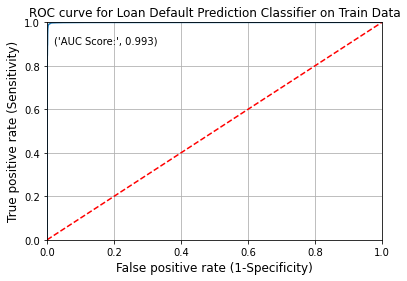

In [134]:
y_pred_prob = rf_classification.predict_proba(train_x)[:,1]
    
    # the roc_curve() returns the values for false positive rate, true positive rate and threshold
    # pass the actual target values and predicted probabilities to the function
fpr, tpr, thresholds = roc_curve(train_y, y_pred_prob)

    # plot the ROC curve
plt.plot(fpr, tpr)

    # set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Loan Default Prediction Classifier on Train Data', fontsize = 12)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 12)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 12)

    # add the AUC score to the plot
    # 'x' and 'y' gives position of the text
    # 's' is the text 
    # use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(train_y, ypred_rf_train),4)))

    # plot the grid
plt.grid(True)

## ADA Boost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier


In [ ]:
ada_model = AdaBoostClassifier(n_estimators = 40, random_state = 10)

# fit the model using fit() on train data
ada_model.fit(train_x, train_y)

In [ ]:
y_pred_ada = ada_model.predict(test_x)

In [ ]:
test_y = test_y.astype('int')

In [ ]:
cm_ada = confusion_matrix(test_y, y_pred_ada)
print(cm_ada)

In [ ]:
TN4 = cm_ada[0,0]

TP4 = cm_ada[1,1]

FP4 = cm_ada[0,1]

FN4 = cm_ada[1,0]

In [ ]:
accuracy_score(test_y, y_pred_ada)

In [ ]:
print(classification_report(test_y, y_pred_ada))

In [ ]:
train_x.boxplot()
plt.xticks(rotation = 90)

In [ ]:
test_x.boxplot()

## SGD classifier

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
sgd = SGDClassifier(loss= "modified_huber", shuffle = True, random_state= 10).fit(train_x, train_y)

In [ ]:
sgd_pred = sgd.predict(test_x)

In [ ]:
print(classification_report(test_y, sgd_pred))

In [ ]:
# If we think in terms of business growth, we can see that here in this classification problem
# FN is more impactful than FP. Because if we have higher FN, then it simply means that we are claiming
# our non default customer as a default one. This can lower the brand image about the company in customer's minde
# which eventually may lead to lower customer base, lower market share growth.


In [ ]:
print(confusion_matrix(test_y, sgd_pred))

In [ ]:
print(round(accuracy_score(test_y, sgd_pred),2)*100)

In [ ]:
from sklearn.metrics import balanced_accuracy_score, f1_score, recall_score

In [ ]:
print("Balanced Accuracy Score ",balanced_accuracy_score(test_y, sgd_pred))

In [ ]:
print("Recall Score ",recall_score(test_y, sgd_pred))

In [ ]:
print("F1 Score ",f1_score(test_y, sgd_pred))

In [ ]:
test_y.value_counts()